# MARQUER Matthieu
## Projet 5: Catégorisez automatiquement des questions
 ![alt text](img/16480242457412.png "Stack Overflow")
 Part: 1 Nettoyage


### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

### Modification des options

In [2]:
# https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
#pd.set_option("display.max_rows", 200)
#pd.set_option("display.max_colwidth", 500)
#pd.set_option('display.max_columns', 100)

### Importation des fichiers

In [3]:
data = pd.read_csv('data/source/QueryResults.csv')
data.head(3)

,Id,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,CreationDate
0,11227809,Why is processing a sorted array faster than p...,"<p>In this C++ code, sorting the data (<em>bef...",<java><c++><performance><cpu-architecture><bra...,27160,1851289,0.0,25,2012-06-27 13:51:36
1,2003505,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,20380,11236108,0.0,41,2010-01-05 01:12:15
2,1642028,What is the '-->' operator in C/C++?,"<p>After reading <a href=""http://groups.google...",<c++><c><operators><code-formatting><standards...,10112,994570,0.0,26,2009-10-29 06:57:45


### 1.0 - stackoverflow

In [4]:
data.head(2)

,Id,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,CreationDate
0,11227809,Why is processing a sorted array faster than p...,"<p>In this C++ code, sorting the data (<em>bef...",<java><c++><performance><cpu-architecture><bra...,27160,1851289,0.0,25,2012-06-27 13:51:36
1,2003505,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,20380,11236108,0.0,41,2010-01-05 01:12:15


In [5]:
# Nombre de lignes et de colonnes
data.shape

(50000, 9)

In [6]:
data.describe(include="all")

,Id,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,CreationDate
count,5.000000e+04,50000,50000,50000,50000.000000,5.000000e+04,49293.000000,50000.000000,50000
unique,NaN,49999,50000,48706,NaN,NaN,NaN,NaN,49994
top,NaN,A potentially dangerous Request.Form value was...,"<p>In this C++ code, sorting the data (<em>bef...",<javascript><jquery><html><css><twitter-bootst...,NaN,NaN,NaN,NaN,2013-07-12 13:28:17
freq,NaN,2,1,31,NaN,NaN,NaN,NaN,2
mean,2.204007e+07,NaN,NaN,NaN,85.186840,9.006724e+04,0.000811,6.177000,NaN
std,1.824021e+07,NaN,NaN,NaN,283.783728,2.173949e+05,0.144692,5.933739,NaN
min,4.000000e+00,NaN,NaN,NaN,20.000000,2.060000e+02,0.000000,1.000000,NaN
25%,6.153363e+06,NaN,NaN,NaN,26.000000,1.779975e+04,0.000000,3.000000,NaN
50%,1.760211e+07,NaN,NaN,NaN,37.000000,3.920550e+04,0.000000,5.000000,NaN
75%,3.492368e+07,NaN,NaN,NaN,68.000000,8.635250e+04,0.000000,8.000000,NaN


In [7]:
# Types
data.dtypes

Id                 int64
Title             object
Body              object
Tags              object
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
CreationDate      object
dtype: object

In [8]:
# Nombre de valeur manquantes par colonne
data.isna().sum()

Id                 0
Title              0
Body               0
Tags               0
Score              0
ViewCount          0
FavoriteCount    707
AnswerCount        0
CreationDate       0
dtype: int64

In [9]:
# Nombre de valeur differentes par colonne
data.nunique()

Id               50000
Title            49999
Body             50000
Tags             48706
Score             1148
ViewCount        41263
FavoriteCount        3
AnswerCount         79
CreationDate     49994
dtype: int64

In [10]:
# Recuperation des tags
import re

tags = data["Tags"].apply(lambda x: re.findall(r'<(.*?)>', x))
tags

0        [java, c++, performance, cpu-architecture, bra...
1        [git, version-control, git-branch, git-push, g...
2        [c++, c, operators, code-formatting, standards...
3        [git, version-control, overwrite, git-pull, gi...
4        [data-structures, memory-management, heap-memo...
                               ...                        
49995        [javascript, reactjs, testing, redux, jestjs]
49996                  [jquery, python, json, post, flask]
49997    [performance, debugging, haskell, ghc, type-co...
49998         [c#, sql, database, winforms, sqldatareader]
49999           [c#, asp.net, http, redirect, asp-classic]
Name: Tags, Length: 50000, dtype: object

In [11]:
# Concatenation de tags
tags_global = [tag for sublist in tags for tag in sublist]

# Nombre d'apparition de chaque tag 
from collections import Counter
tags_global = Counter(tags_global)

# Tags par ordre des plus utilisé au moins utilisé
tags_decroissant = sorted(tags_global.items(), key=lambda x: x[1], reverse=True)

# Top 50 des tags les plus utilisé
tags_top_50 = tags_decroissant[:50]

# Dataframe de tags_top_50
tags_top_50 = pd.DataFrame(tags_top_50)

# list top 50
top_50_list = set(tags_top_50[0])

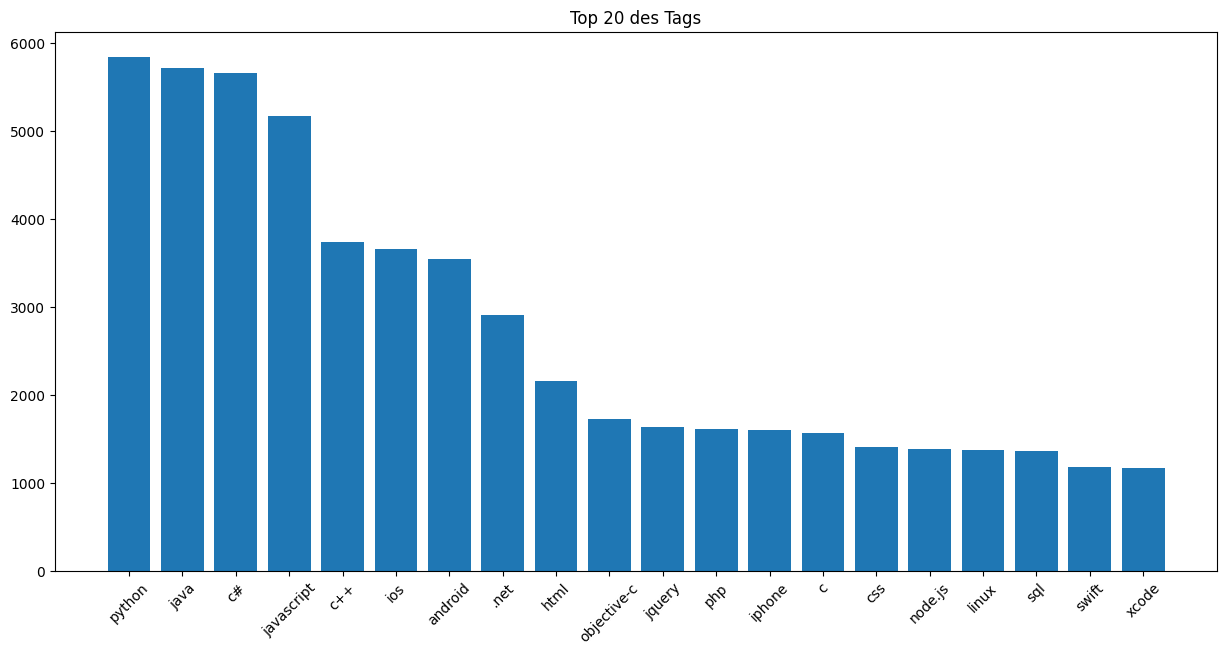

In [12]:
# Top 20
tags_top_20 = pd.DataFrame(tags_decroissant[:20])

# Graphique top 20
plt.figure(figsize=(15, 7))
plt.title("Top 20 des Tags")
plt.bar(tags_top_20[0], tags_top_20[1])
plt.xticks(rotation=45)
plt.show()

# Fonction commune

import nltk
nltk.download('stopwords')

In [13]:
# Fusion Title et Body
data["Title_Body"] = data["Title"] + " " + data["Body"]

In [14]:
# Application des fonctions
from fonction import *

# Supprimer les liens html et garde seulement les lettres + limite a 25 characteres
data["Title_Body"] = data["Title_Body"].apply(clean_and_filter)

# Stop word filter
data['Title_Body'] = data['Title_Body'].apply(lambda x: ' '.join(stop_word_filter_fct(x.split())))

# Lemmatisation
# data["Title_Body"] = data["Title_Body"].apply(transform_bow_lem_fct)

# Stemmatisation
# data["Title_Body"] = data["Title_Body"].apply(stem_fct)

data.head(2)



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matthieu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/matthieu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,CreationDate,Title_Body
0,11227809,Why is processing a sorted array faster than p...,"<p>In this C++ code, sorting the data (<em>bef...",<java><c++><performance><cpu-architecture><bra...,27160,1851289,0.0,25,2012-06-27 13:51:36,Why processing sorted array faster processing ...
1,2003505,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,20380,11236108,0.0,41,2010-01-05 01:12:15,How delete Git branch locally remotely Failed ...


## Sauvegarde du DataFrame en CSV

In [17]:
# Sauvegarde du dataframe
data.to_csv('data/cleaned/data_cleaned.csv', index=False)